In [1]:
%pip install requests
import requests

url = "https://storage.googleapis.com/ads-dataset/subfolder-0.zip"
destination = "subfolder-0.zip"

response = requests.get(url)

if response.status_code == 200:
    with open(destination, "wb") as file:
        file.write(response.content)
    print("Downloaded successfully!")
else:
    print(f"Failed to download. Status code: {response.status_code}")


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Downloaded successfully!


In [2]:
url = "https://storage.googleapis.com/ads-dataset/subfolder-1.zip"
destination = "subfolder-1.zip"

response = requests.get(url)

if response.status_code == 200:
    with open(destination, "wb") as file:
        file.write(response.content)
    print("Downloaded successfully!")
else:
    print(f"Failed to download. Status code: {response.status_code}")


Downloaded successfully!


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Basic Statistics:
              Width        Height          Size
count  11106.000000  11106.000000  1.110600e+04
mean     743.113632    735.070322  1.006300e+05
std      513.579267    533.361875  1.802737e+05
min      256.000000    256.000000  5.892000e+03
25%      480.000000    415.000000  3.435125e+04
50%      600.000000    600.000000  5.483050e+04
75%      800.000000    849.000000  9.977550e+04
max     8000.000000   7780.000000  3.802873e+06


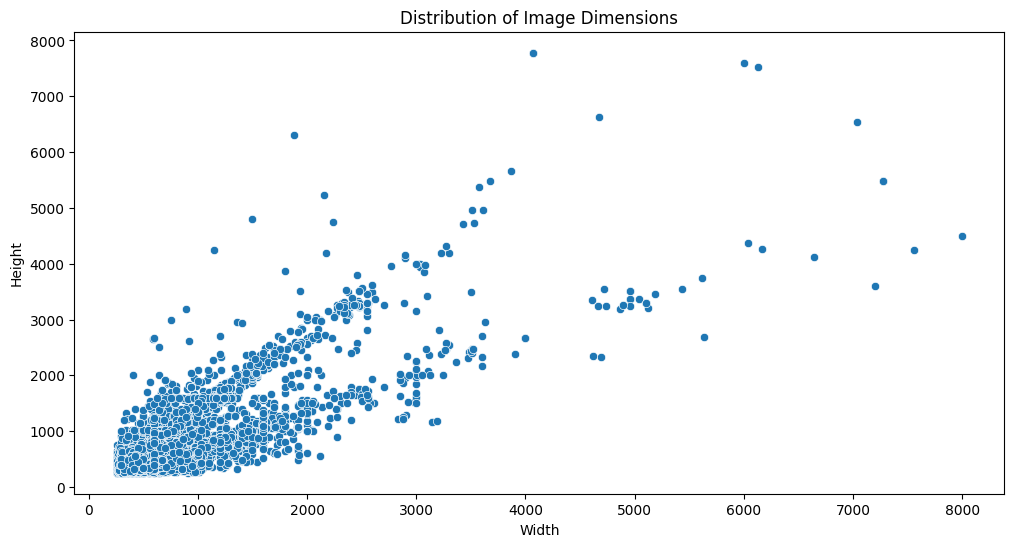

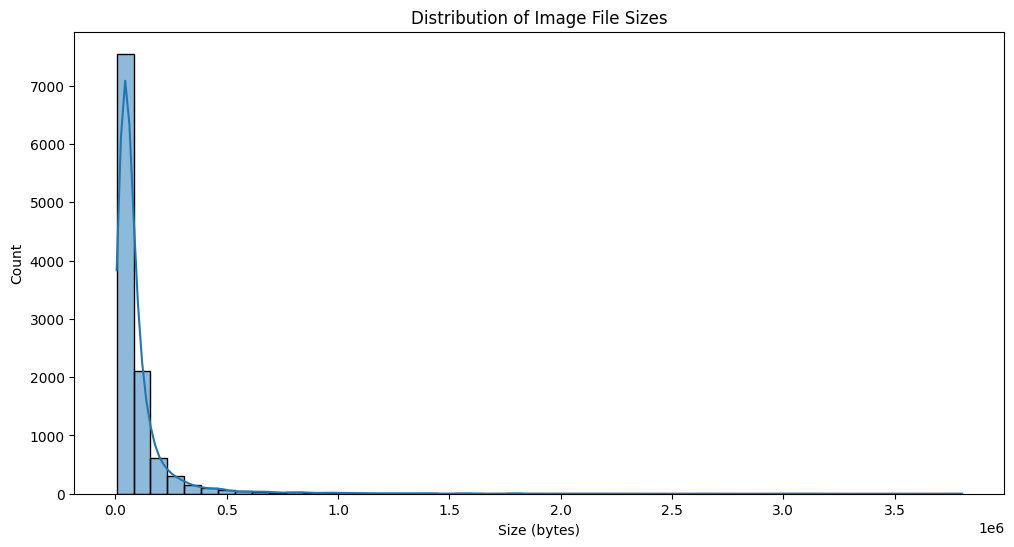

In [8]:
%pip install Pillow
%pip install pandas
%pip install matplotlib
%pip install seaborn


import os
import zipfile
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the zip files
zip_file_path_0 = 'subfolder-0.zip'
zip_file_path_1 = 'subfolder-1.zip'

extract_to_dir = 'Bilder'

def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Extract the datasets
extract_zip(zip_file_path_0, extract_to_dir)
extract_zip(zip_file_path_1, extract_to_dir)

def analyze_images(directory):
    image_data = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                with Image.open(image_path) as img:
                    width, height = img.size
                    image_data.append([file, width, height, img.mode, os.path.getsize(image_path)])
    
    return pd.DataFrame(image_data, columns=['Filename', 'Width', 'Height', 'Mode', 'Size'])

# Analyze the extracted images
combined_df = analyze_images(extract_to_dir)

# Basic statistics
print("Basic Statistics:")
print(combined_df.describe())

# Distribution of image dimensions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Width', y='Height', data=combined_df)
plt.title('Distribution of Image Dimensions')
plt.show()

# Distribution of image file sizes
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['Size'], bins=50, kde=True)
plt.title('Distribution of Image File Sizes')
plt.xlabel('Size (bytes)')
plt.ylabel('Count')
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import os

def get_unique_colors(image_path):
    try:
        with Image.open(image_path) as img:
            # Ensure the image is in RGB format, even if it's grayscale
            # This converts grayscale and RGBA to RGB as needed
            img_rgb = img.convert('RGB')
            img_array = np.array(img_rgb)
            # Since we've ensured the image is in RGB, we can safely use shape[2]
            unique_colors = np.unique(img_array.reshape(-1, img_array.shape[2]), axis=0)
            return len(unique_colors)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Adjust the path construction if needed and apply the function
combined_df['Unique_Colors'] = combined_df['Filename'].apply(lambda x: get_unique_colors(os.path.join(extract_to_dir, x)))

print(combined_df.head())




Error processing Bilder\10000.jpg: [Errno 2] No such file or directory: 'Bilder\\10000.jpg'
Error processing Bilder\100000.jpg: [Errno 2] No such file or directory: 'Bilder\\100000.jpg'
Error processing Bilder\100010.jpg: [Errno 2] No such file or directory: 'Bilder\\100010.jpg'
Error processing Bilder\100040.jpg: [Errno 2] No such file or directory: 'Bilder\\100040.jpg'
Error processing Bilder\100060.jpg: [Errno 2] No such file or directory: 'Bilder\\100060.jpg'
Error processing Bilder\100080.jpg: [Errno 2] No such file or directory: 'Bilder\\100080.jpg'
Error processing Bilder\10010.jpg: [Errno 2] No such file or directory: 'Bilder\\10010.jpg'
Error processing Bilder\100100.jpg: [Errno 2] No such file or directory: 'Bilder\\100100.jpg'
Error processing Bilder\100160.jpg: [Errno 2] No such file or directory: 'Bilder\\100160.jpg'
Error processing Bilder\100170.jpg: [Errno 2] No such file or directory: 'Bilder\\100170.jpg'
Error processing Bilder\100180.jpg: [Errno 2] No such file or di

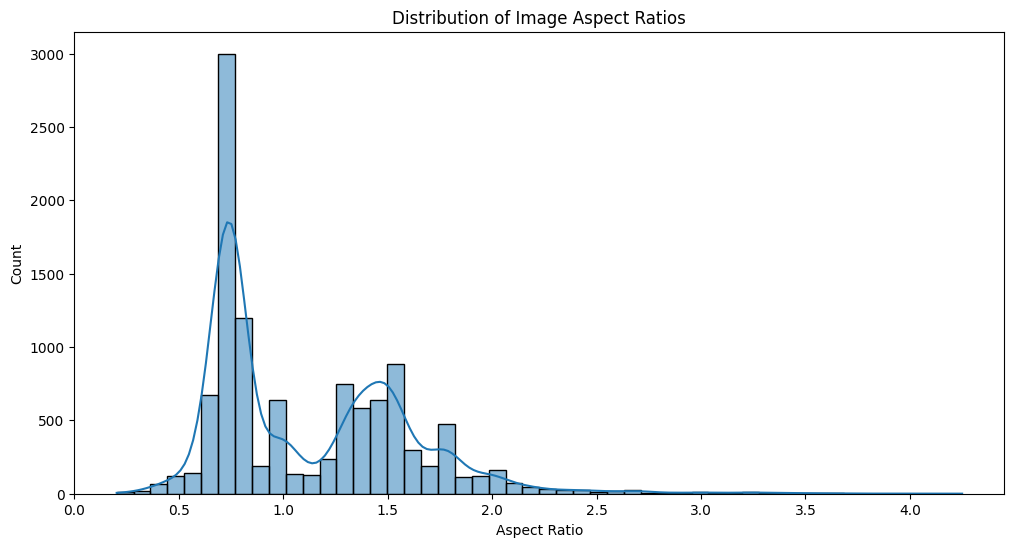

In [ ]:
# Calculate aspect ratio
combined_df['Aspect_Ratio'] = combined_df['Width'] / combined_df['Height']

# Plot the distribution of aspect ratios
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['Aspect_Ratio'], bins=50, kde=True)
plt.title('Distribution of Image Aspect Ratios')
plt.xlabel('Aspect Ratio')
plt.ylabel('Count')
plt.show()


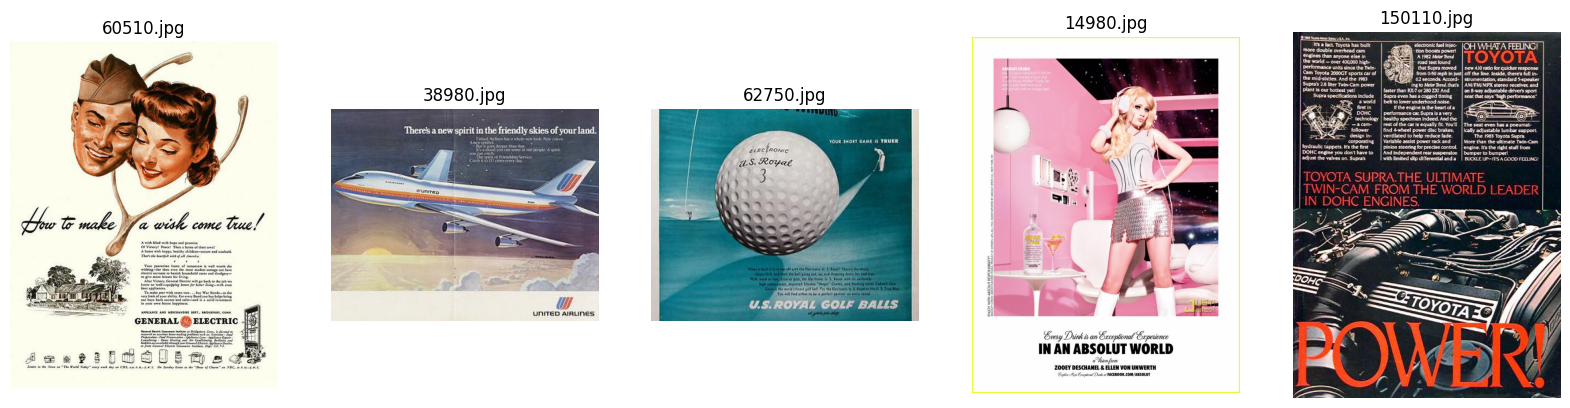

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def display_sample_images(df, extract_to_dir):
    sample_images = df['Filename'].sample(5)  # Adjust the number of samples as needed
    fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 10))

    if len(sample_images) == 1:  # If only one sample, axes is not an array
        axes = [axes]

    for ax, img_name in zip(axes, sample_images):
        # Determine the correct subdirectory for each image
        for subfolder in ['0', '1']:
            img_path = os.path.join(extract_to_dir, subfolder, img_name)
            if os.path.exists(img_path):
                try:
                    img = mpimg.imread(img_path)
                    ax.imshow(img)
                    ax.axis('off')
                    ax.set_title(img_name)
                    break  # Image found, no need to check other subfolders
                except FileNotFoundError:
                    print(f"File not found: {img_path}")  # Debug print for missing files
                    continue
        else:
            print(f"Image not found in any subfolder: {img_name}")

    plt.show()

# Ensure combined_df and extract_to_dir are correctly defined before calling
display_sample_images(combined_df, extract_to_dir)


